<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/017_PCA_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/17_PCA_Dimensionality_Reduction.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 📉 PCA: Jak zobaczyć niewidzialne? (Redukcja Wymiarów)

Wyobraź sobie, że trzymasz w ręku kubek (obiekt 3D).
Rzucasz jego cień na ścianę (obraz 2D).

1.  Jeśli poświecisz latarką od spodu -> Cień będzie kołem.
2.  Jeśli poświecisz od boku -> Cień będzie prostokątem z uchem.

Który cień daje więcej informacji? Ten z uchem!
**PCA to algorytm, który szuka "najlepszego kąta świecenia latarką"**, żeby cień (dane 2D) zachował jak najwięcej szczegółów z oryginału (dane wielowymiarowe).

Użyjemy zbioru **Iris** (Kwiaty).
Mamy tam 4 wymiary (Długość/Szerokość Płatka i Działki).
Zredukujemy to do 2 wymiarów, żeby zobaczyć te kwiaty na ekranie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. ŁADUJEMY DANE (4 Wymiary)
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Zamieniamy na DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

print(f"Rozmiar danych: {df.shape}")
print("Mamy 4 kolumny. Nie da się narysować wykresu 4D.")
display(df.head())

Rozmiar danych: (150, 4)
Mamy 4 kolumny. Nie da się narysować wykresu 4D.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Krok 1: Standaryzacja (Bardzo Ważne!)

PCA jest bardzo wrażliwe na skalę (jak K-Means).
Jeśli jedna kolumna jest w milimetrach (małe liczby), a druga w metrach (duże liczby), PCA uzna, że ta w metrach jest ważniejsza.
Musimy sprowadzić wszystko do wspólnego mianownika (StandardScaler).

In [2]:
# Skalujemy dane (średnia = 0, odchylenie = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dane przeskalowane. Średnia każdej kolumny to teraz ~0.")

Dane przeskalowane. Średnia każdej kolumny to teraz ~0.


## Krok 2: PCA w akcji

Mówimy algorytmowi: *"Znajdź mi 2 Główne Składniki (Principal Components), które najlepiej opisują te dane"*.

Te nowe kolumny (PC1 i PC2) to nie są już "Długość płatka".
To są **sztuczne, matematyczne hybrydy** wszystkich cech, wymieszane tak, żeby zmaksymalizować widoczność różnic.

In [3]:
# 1. Uruchamiamy PCA (Redukcja 4D -> 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tworzymy nowy DataFrame z wynikami
df_pca = pd.DataFrame(data=X_pca, columns=['PC1 (Główna Oś)', 'PC2 (Druga Oś)'])
df_pca['Gatunek'] = [target_names[i] for i in y]

print("--- DANE PO KOMPRESJI ---")
display(df_pca.head())

# 2. ILE INFORMACJI ZACHOWALIŚMY? (Explained Variance)
# To mówi nam, jak dokładny jest nasz "cień".
variance = pca.explained_variance_ratio_
print(f"\nIle informacji niesie PC1? {variance[0]*100:.2f}%")
print(f"Ile informacji niesie PC2? {variance[1]*100:.2f}%")
print(f"SUMA: {sum(variance)*100:.2f}% informacji z oryginału zostało zachowane!")

--- DANE PO KOMPRESJI ---


,PC1 (Główna Oś),PC2 (Druga Oś),Gatunek
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa



Ile informacji niesie PC1? 72.96%
Ile informacji niesie PC2? 22.85%
SUMA: 95.81% informacji z oryginału zostało zachowane!


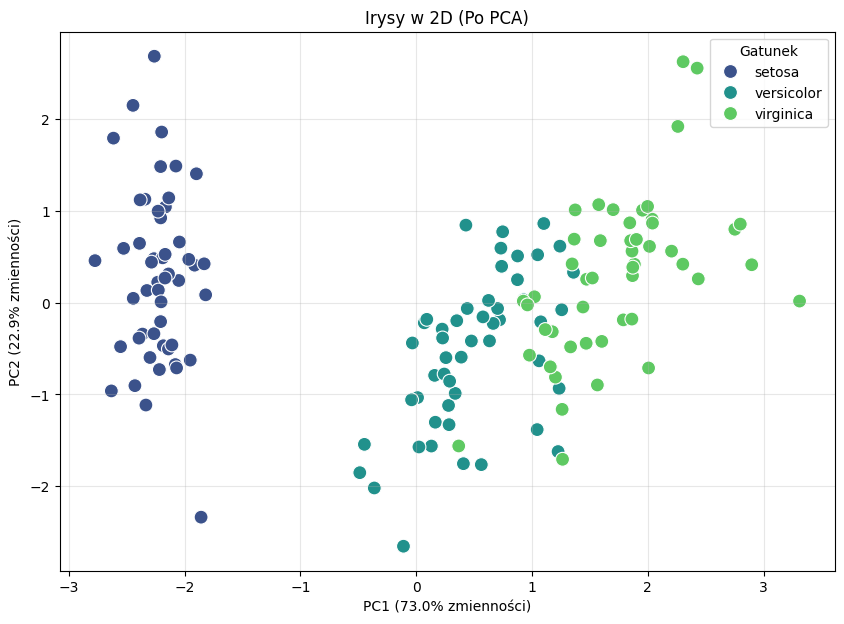

In [4]:
# 3. WIZUALIZACJA (Moment Prawdy)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1 (Główna Oś)', y='PC2 (Druga Oś)', hue='Gatunek', data=df_pca, palette='viridis', s=100)

plt.title("Irysy w 2D (Po PCA)")
plt.xlabel(f"PC1 ({variance[0]*100:.1f}% zmienności)")
plt.ylabel(f"PC2 ({variance[1]*100:.1f}% zmienności)")
plt.grid(True, alpha=0.3)
plt.show()

## 🧠 Podsumowanie: Stratna Kompresja

Co widzisz na wykresie?
Mimo że spłaszczyliśmy 4 wymiary do 2, **grupy są nadal idealnie rozdzielone**.
Gatunek *Setosa* jest daleko od pozostałych.
To znaczy, że PCA zadziałało – usunęło szum, a zostawiło istotę danych.

**Tu jest haczyk.**
PCA to **kompresja stratna** (jak JPG).
Straciliśmy około 4% informacji (bo suma wariancji to ~96%, a nie 100%).
Zawsze tracisz trochę niuansów, ale zyskujesz możliwość:
1.  Wizualizacji danych.
2.  Szybszego trenowania modeli (mniej kolumn = szybciej).

**Zastosowanie w AI (Embeddings):**
Gdy wgrasz do bazy wektorowej milion dokumentów, każdy ma 1536 wymiarów. Używa się technik podobnych do PCA (np. t-SNE lub UMAP), żeby narysować je na płaszczyźnie i zobaczyć: *"O, tutaj zgrupowały się wszystkie dokumenty o finansach, a tam o sporcie"*.